In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

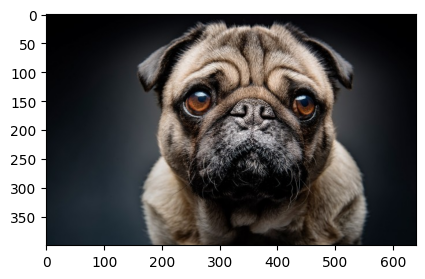

In [2]:
plt.figure(figsize=(5,3))
img = plt.imread('CuteDog.jpg')
plt.imshow(img)
plt.grid(False)
plt.show()

In [3]:
img.shape

(400, 640, 3)

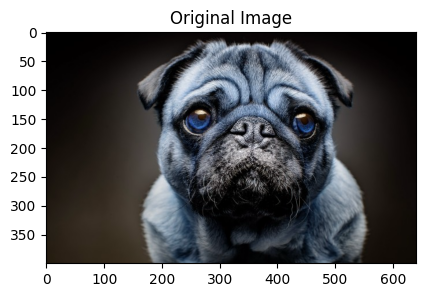

In [4]:
def catImageshow(imageTitle,image):
    color_convert = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5,3))
    plt.imshow(color_convert)
    plt.title(imageTitle)
    plt.show()
catImageshow("Original Image",img)

# Gray

In [5]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [6]:
gray.shape

(400, 640)

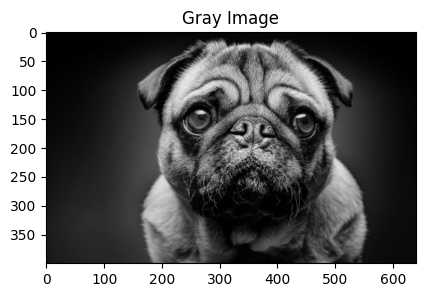

In [7]:
catImageshow("Gray Image",gray)

In [8]:
gradientX = cv2.Sobel(gray,ddepth = cv2.CV_32F,dx=1,dy=0,ksize = 3)
gradientY = cv2.Sobel(gray,ddepth = cv2.CV_32F,dx=0,dy=1,ksize=3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


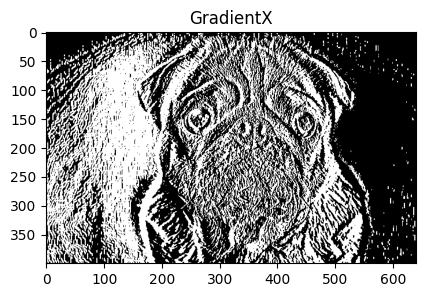

In [9]:
catImageshow("GradientX",gradientX)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


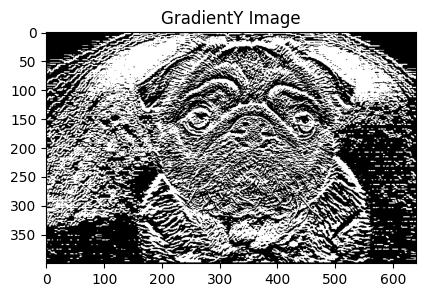

In [10]:
catImageshow("GradientY Image",gradientY)

# Masking

In [11]:
img.shape

(400, 640, 3)

In [12]:
img.shape[:2]

(400, 640)

In [13]:
mask = np.zeros(img.shape[:2],dtype="uint8")

In [14]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

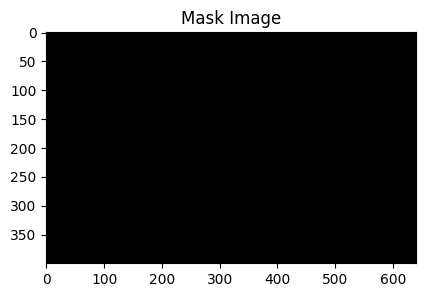

In [15]:
cv2.rectangle(mask,(100, 500), (150, 100), 0)
catImageshow("Mask Image",mask)

# Bit_Mask

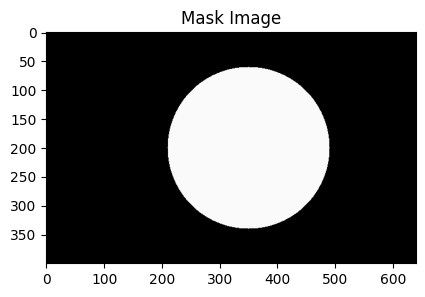

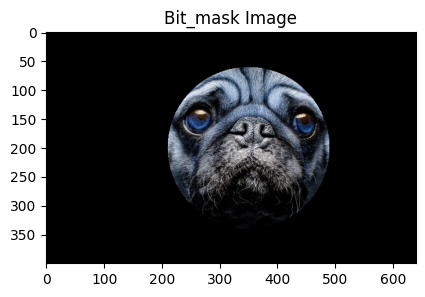

In [16]:
cv2.circle(mask, (350, 200), 140, 250, -1)
bit_mask = cv2.bitwise_and(img,img,mask = mask)
catImageshow("Mask Image",mask)
catImageshow("Bit_mask Image",bit_mask)

# Image Scalling

In [17]:
img.shape

(400, 640, 3)

In [18]:
img/255

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.0627451 , 0.10196078, 0.1372549 ],
        [0.0627451 , 0.10196078, 0.1372549 ],
        [0.0627451 , 0

In [19]:
img.shape

(400, 640, 3)

# Resize Image

In [20]:
customsizeH = 120/img.shape[0]

In [21]:
customsizeW = 120/img.shape[1]

In [22]:
customsizeW

0.1875

In [23]:
customsizeH

0.3

In [24]:
imgDimension = (120,int(img.shape[0]*customsizeW))

In [25]:
imgDimension

(120, 75)

In [26]:
img.shape

(400, 640, 3)

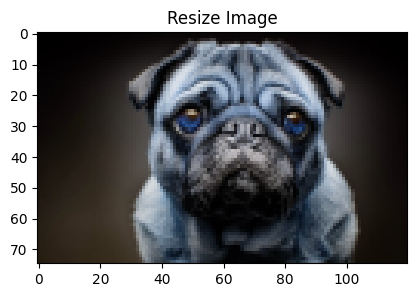

In [27]:
resizeImage = cv2.resize(img,imgDimension,interpolation = cv2.INTER_AREA)
catImageshow("Resize Image",resizeImage)

In [28]:
resizeImage.shape

(75, 120, 3)

# Rotate Image

In [29]:
(imageH,imageW) = img.shape[:2]

In [30]:
imageH

400

In [31]:
imageW

640

In [32]:
(centerX,centerY) = (imageH//2,imageW//2)

In [33]:
centerX

200

In [34]:
centerY

320

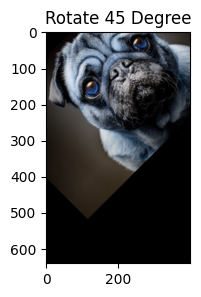

In [35]:
imageRorate = cv2.getRotationMatrix2D((centerX,centerY),45,1.0)
rotateNow = cv2.warpAffine(img,imageRorate,(imageH,imageW))
catImageshow("Rotate 45 Degree",rotateNow)

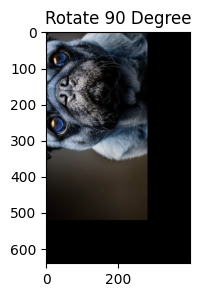

In [36]:
imageRorate = cv2.getRotationMatrix2D((centerX,centerY),90,1.0)
rotateNow = cv2.warpAffine(img,imageRorate,(imageH,imageW))
catImageshow("Rotate 90 Degree",rotateNow)

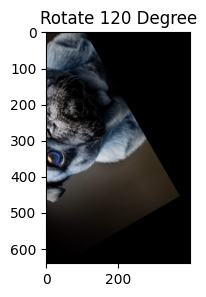

In [37]:
imageRorate = cv2.getRotationMatrix2D((centerX,centerY),120,1.0)
rotateNow = cv2.warpAffine(img,imageRorate,(imageH,imageW))
catImageshow("Rotate 120 Degree",rotateNow)

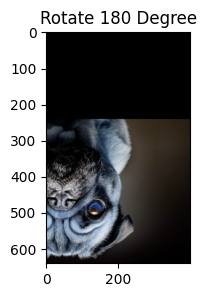

In [38]:
imageRorate = cv2.getRotationMatrix2D((centerX,centerY),180,1.0)
rotateNow = cv2.warpAffine(img,imageRorate,(imageH,imageW))
catImageshow("Rotate 180 Degree",rotateNow)